## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'])]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = duplicateRowsDF['Mouse ID'].unique()


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for duplicate in duplicates:
    mouse_data = mouse_data[mouse_data['Mouse ID'] != duplicate] 
#mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_data['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
#regimen.describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#regimen.mean()
#regimen.median()
#regimen.var()
#regimen.std()
#regimen.sem()

# Assemble the resulting series into a single summary dataframe.
tumor_statistics = pd.DataFrame({'Mean':regimen.mean(),
             'Median':regimen.median(),
              'Variance':regimen.var(),
             'Standard deviation':regimen.std(),
             'SEM':regimen.sem()})
tumor_statistics

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


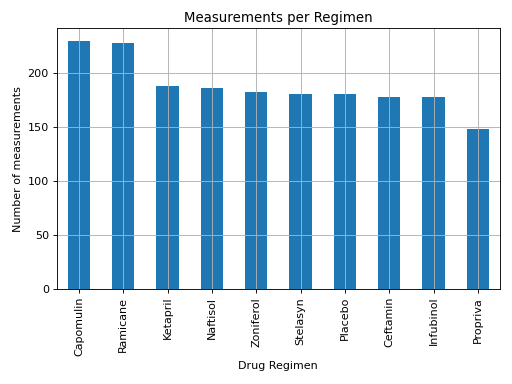

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plt.figure()
mouse_bar = mouse_data['Drug Regimen'].value_counts().plot(kind = 'bar')
mouse_bar.grid()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of measurements')
plt.title('Measurements per Regimen')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


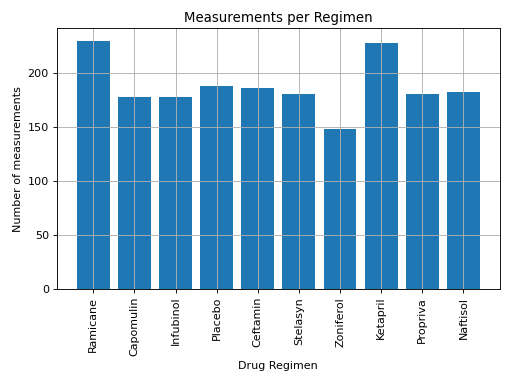

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure()
plt.bar(mouse_data['Drug Regimen'].unique(),mouse_data.groupby('Drug Regimen')['Mouse ID'].count())
plt.xlabel('Drug Regimen')
plt.ylabel('Number of measurements')
plt.title('Measurements per Regimen')
plt.xticks(rotation='vertical')
plt.grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


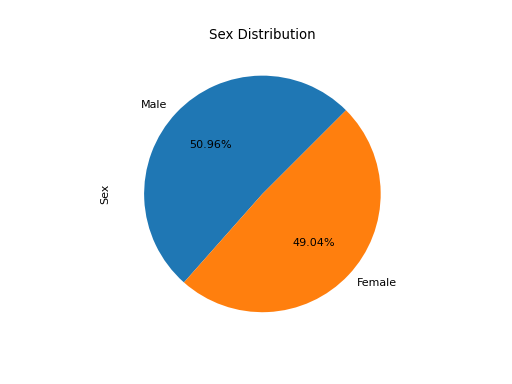

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure()
mouse_bar = mouse_data['Sex'].value_counts().plot(kind = 'pie',autopct="%1.2f%%",startangle=45)

plt.title('Sex Distribution')
plt.show()


<IPython.core.display.Javascript object>


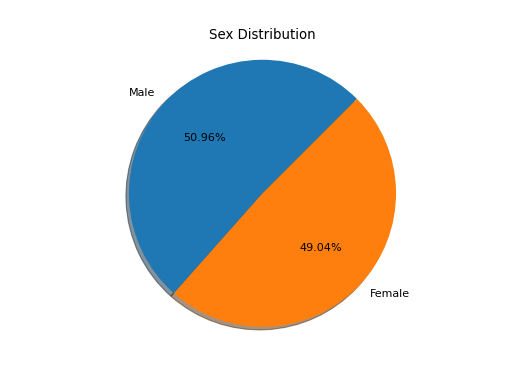

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
plt.pie(mouse_data['Sex'].value_counts(),labels=mouse_data['Sex'].unique(), autopct="%1.2f%%", shadow=True, startangle=45)
# Tells matplotlib that we want a pie chart with equal axes
plt.title('Sex Distribution')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = 'Capomulin Ramicane Infubinol Ceftamin'.split()
# Start by getting the last (greatest) timepoint for each mouse
last_tumor = mouse_data[['Mouse ID','Timepoint']].groupby('Mouse ID').max()
mouseids = last_tumor.index.tolist()
mouselast = last_tumor['Timepoint'].tolist()
tumor = []
for i in range(len(mouseids)):
    tumor.append(mouse_data.loc[(mouse_data['Mouse ID'] == mouseids[i]) 
                                & (mouse_data['Timepoint'] == mouselast[i])]['Tumor Volume (mm3)'].tolist()[0])
#tumor
last_tumor_size = pd.DataFrame({'Mouse ID':mouseids,
                               'Last Tumor Size':tumor})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_data = pd.merge(mouse_data, last_tumor_size, on='Mouse ID')
df = mouse_last_data[['Drug Regimen','Last Tumor Size']]

df[df['Drug Regimen'].isin(regimens)].groupby('Drug Regimen').mean()

,Last Tumor Size
Drug Regimen,
Capomulin,36.426321
Ceftamin,61.658900
Infubinol,61.315325
Ramicane,35.609686


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    temporal_df = mouse_last_data.loc[mouse_last_data['Drug Regimen'] == regimen]
    # Determine outliers using upper and lower bounds
    tumorvol.append(temporal_df['Tumor Volume (mm3)'])
    quartiles = temporal_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower = lowerq - (1.5 * iqr)
    upper= upperq + (1.5 * iqr)
    print(f'Values below {round(lower,2)} and above {round(upper,2)} would be considered outliers in drug regimen {regimen}')

    

Values below 26.71 and above 55.97 would be considered outliers in drug regimen Capomulin
Values below 24.19 and above 57.49 would be considered outliers in drug regimen Ramicane
Values below 32.31 and above 72.32 would be considered outliers in drug regimen Infubinol
Values below 32.82 and above 71.19 would be considered outliers in drug regimen Ceftamin


<IPython.core.display.Javascript object>


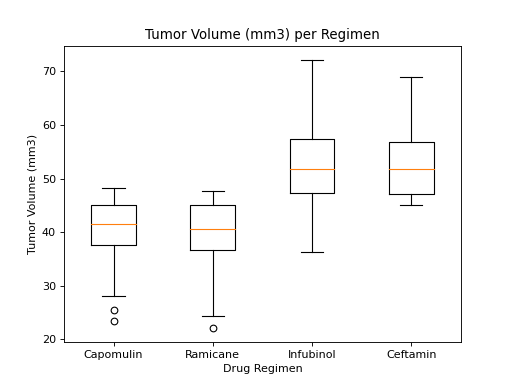

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#plt.figure()
fig1, ax1 = plt.subplots()
plt.title('Tumor Volume (mm3) per Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumorvol)
plt.xticks([1,2,3,4],regimens)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


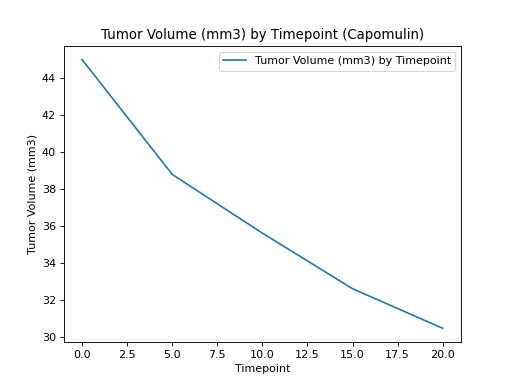

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure()
mouse_data = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
#The unique method combined with the brackets here allow us to pick any mouse just by their number in the dataframe
single = mouse_data.loc[mouse_data['Mouse ID'] == mouse_data['Mouse ID'].unique()[3]]
plt.plot(single["Timepoint"], single["Tumor Volume (mm3)"], label="Tumor Volume (mm3) by Timepoint")
plt.title("Tumor Volume (mm3) by Timepoint (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


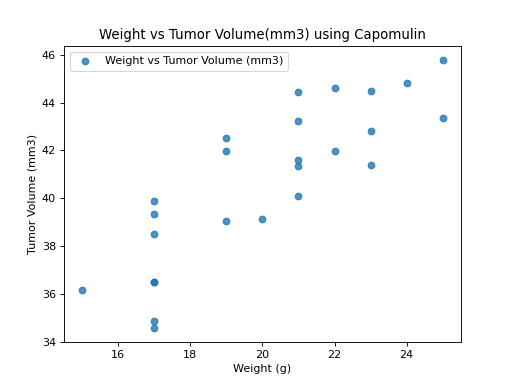

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure()
#The weight is constant throughout the timepoints so we can calculate the mean for both
average =  mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

x_axis = average["Weight (g)"]
y_axis = average["Tumor Volume (mm3)"]

plt.title("Weight vs Tumor Volume(mm3) using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis, y_axis, marker="o", alpha=0.8, label="Weight vs Tumor Volume (mm3)")
plt.legend()
plt.plot()
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(x_axis, y_axis)
print(f'Correlation for weight and average tumor volume is {round(corr[0],2)} for Capomulin')

Correlation for weight and average tumor volume is 0.84 for Capomulin


<IPython.core.display.Javascript object>


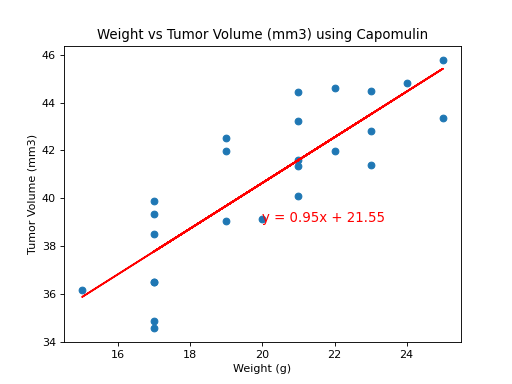

In [22]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Weight vs Tumor Volume (mm3) using Capomulin")

plt.annotate(line_eq,(20,39),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.show()